## FORECAST MODEL: TIME SERIES ANALYSIS

### In this project, I use Berlin temperature data from 2015 to 2020 to make a short-term temperature forecast

### STEP 1
- Plot the data
- Model seasonality and plot it
- Extract the remainder (temperature - seasonal trend)

### STEP 2
- How many lags of remainder should we use?
- Model seasonality and plot it
- Extract the remainder (temperature - seasonal trend)

### STEP 3. Train Data
- How many lags of remainder should we use?
- Model seasonality and plot it
- Extract the remainder (temperature - seasonal trend)

### STEP 4. Model Evaluation with Cross-Validation

### STEP 5. Apply the trained model on test data

### STEP 6. Make predictions

### -----

### STEP 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = (14,6)  # inches

### 1) Load the Data

In [2]:
# custom plot function

def plot_timeseries(df, title="", ylim=True):
    """
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    
    """
    
    df.plot(linestyle='--', marker='o')
    plt.title(title)
    if ylim:
        plt.ylim(ymin=0)
    plt.ylabel("Temperature")
    plt.show()

In [3]:
df = pd.read_csv('Tempelhof_2015_2020.txt', sep=",")   #https://www.ecad.eu/dailydata/customquery.php
df.head(10)
#mean temperature, measured
#Note that the unit of the temperature is 0.1 °C

,SOUID,DATE,TG,Q_TG
0,111448,20150101,39,0
1,111448,20150102,54,0
2,111448,20150103,48,0
3,111448,20150104,36,0
4,111448,20150105,34,0
5,111448,20150106,10,0
6,111448,20150107,22,0
7,111448,20150108,36,0
8,111448,20150109,64,0
9,111448,20150110,88,0


In [4]:
df.columns = df.columns.str.replace(' ','_')  #there are strange spaces

In [5]:
df = df.drop(['_SOUID', '_Q_TG'], axis = 1)
df = df.rename(columns={'____DATE': 'date', '___TG': 'temperature'})

### 2) Inspect the data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   date         2192 non-null   int64
 1   temperature  2192 non-null   int64
dtypes: int64(2)
memory usage: 34.4 KB


### 3) Check descriptive statistics

Mean temperature from 02/218 from 06

In [7]:
df.describe()

,date,temperature
count,2.192000e+03,2192.000000
mean,2.017567e+07,113.572536
std,1.708908e+04,75.586683
min,2.015010e+07,-98.000000
25%,2.016070e+07,53.000000
50%,2.017567e+07,106.000000
75%,2.019070e+07,175.000000
max,2.020123e+07,301.000000


<AxesSubplot:>

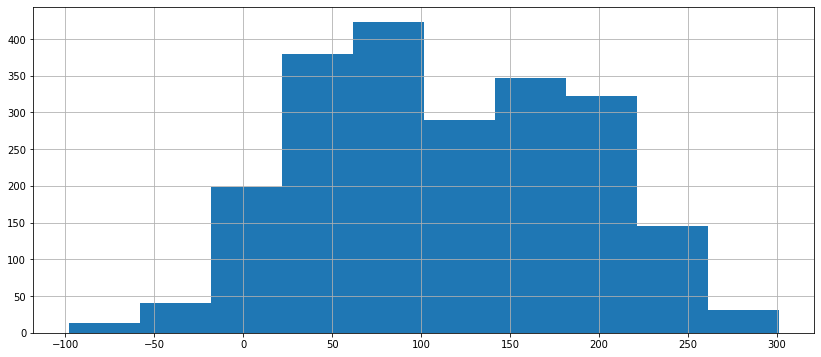

In [8]:
df['temperature'].hist()

### 4) Plot the time series

<AxesSubplot:>

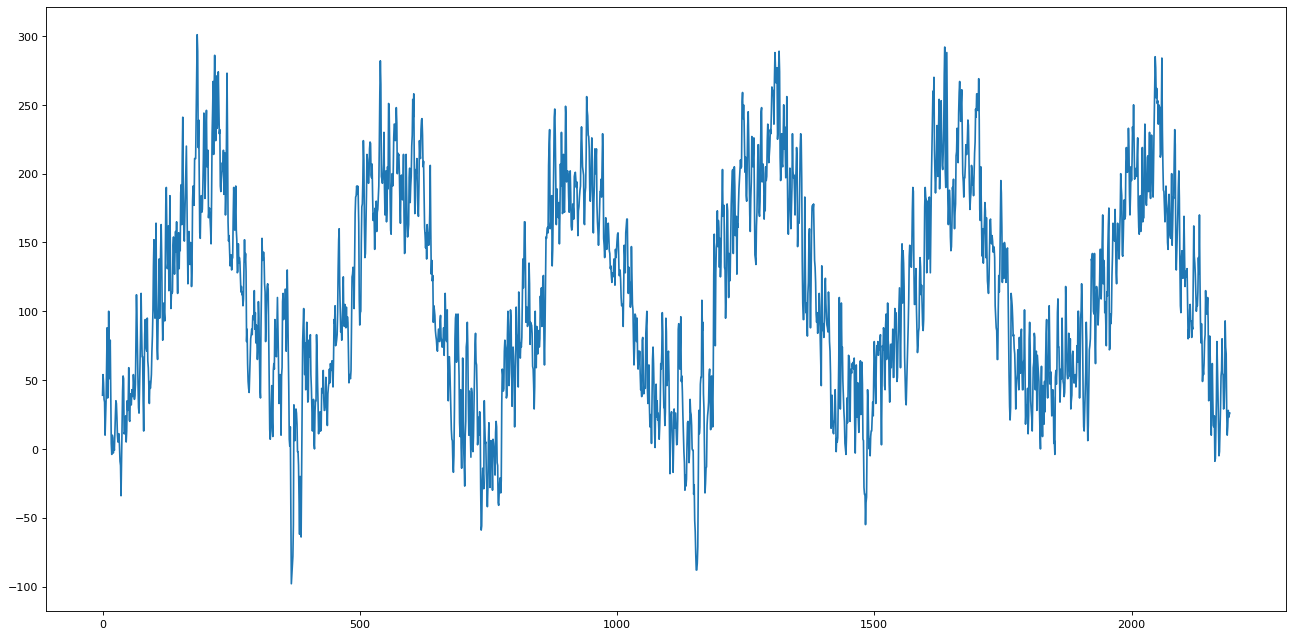

In [9]:
figure(figsize=(20, 10), dpi=80)
df['temperature'].plot()

It's strange to see the total amount of days on X axis, it's  nicer to see the date.

### 5) Create a timestamp and use it as the index


- To get the date in datetime format, first of all it has to be a string

In [10]:
df['date'] = df['date'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         2192 non-null   object
 1   temperature  2192 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.4+ KB


In [11]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,temperature
0,2015-01-01,39
1,2015-01-02,54
2,2015-01-03,48
3,2015-01-04,36
4,2015-01-05,34


In [12]:
df.set_index('date', inplace=True)
df

,temperature
date,
2015-01-01,39
2015-01-02,54
2015-01-03,48
2015-01-04,36
2015-01-05,34
...,...
2020-12-27,16
2020-12-28,28
2020-12-29,23


<AxesSubplot:title={'center':'Temperature in Berlin 2015-2020'}, xlabel='date'>

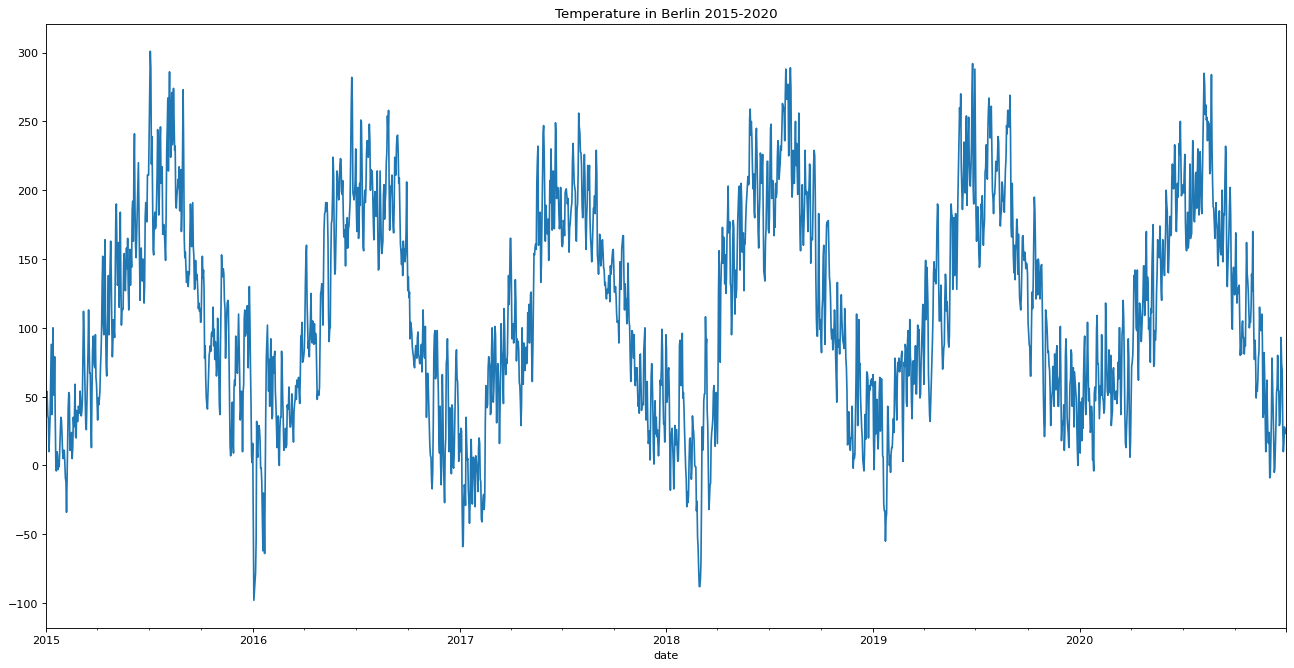

In [13]:
figure(figsize=(20, 10), dpi=80)
df['temperature'].plot(title="Temperature in Berlin 2015-2020")


### 5) Fit a linear model

In [14]:
# create timestep variable to model the trend using LR
df['timestep'] = list(range(len(df)))
df

,temperature,timestep
date,,
2015-01-01,39,0
2015-01-02,54,1
2015-01-03,48,2
2015-01-04,36,3
2015-01-05,34,4
...,...,...
2020-12-27,16,2187
2020-12-28,28,2188
2020-12-29,23,2189


In [15]:
X = df[['timestep']]
y = df['temperature']
X.shape, y.shape

((2192, 1), (2192,))

In [16]:
m = LinearRegression()
m.fit(X, y)  # we treat X and y as "cross-sectional data" - all data points are assumed independent of each other

LinearRegression()

In [17]:
ypred = m.predict(X)
resid = y - ypred

### 5) Plot the original data and the trend

<AxesSubplot:xlabel='date', ylabel='temperature'>

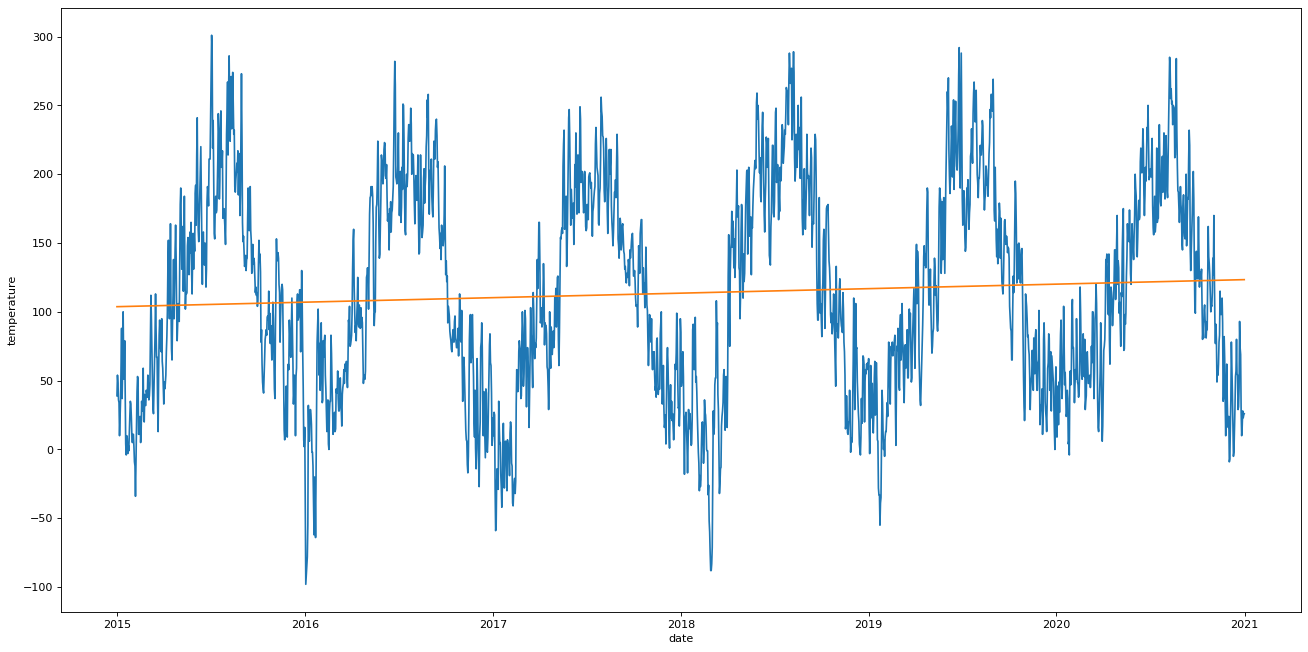

In [18]:
figure(figsize=(20, 10), dpi=80)
sns.lineplot(data=df, y='temperature', x=df.index)
sns.lineplot(data=df, y=ypred, x=df.index)

<AxesSubplot:xlabel='timestep', ylabel='temperature'>

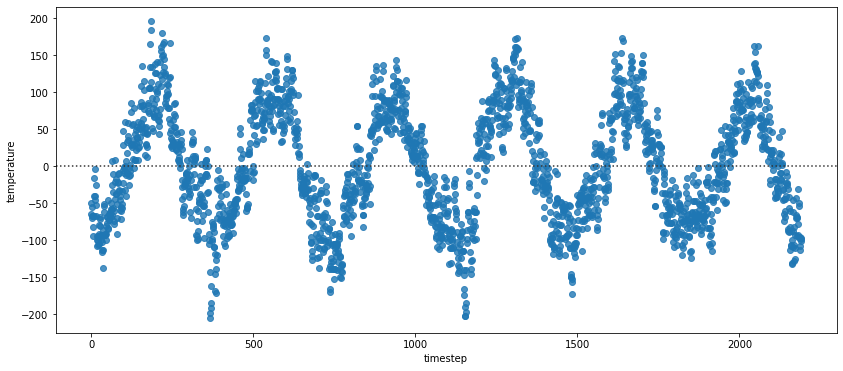

In [19]:
sns.residplot(x=X, y=y)

In [20]:
# predict the future
m.predict([[144], [145], [146], [147], [1200]])

array([105.03992491, 105.04889244, 105.05785998, 105.06682752,
       114.50964413])

In [21]:
ypred = m.predict(X)
df['trend'] = m.predict(X)
df.head(10)

,temperature,timestep,trend
date,,,
2015-01-01,39,0,103.748600
2015-01-02,54,1,103.757567
2015-01-03,48,2,103.766535
2015-01-04,36,3,103.775502
2015-01-05,34,4,103.784470
2015-01-06,10,5,103.793437
2015-01-07,22,6,103.802405
2015-01-08,36,7,103.811372
2015-01-09,64,8,103.820340


<AxesSubplot:xlabel='date'>

<Figure size 1600x800 with 0 Axes>

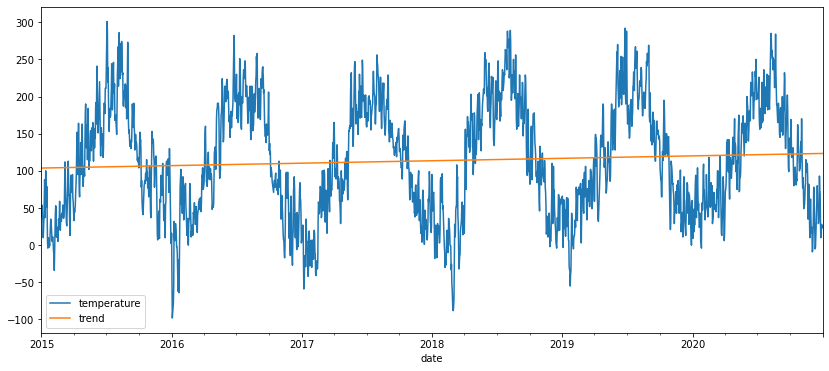

In [22]:
figure(figsize=(20, 10), dpi=80)
df[['temperature', 'trend']].plot()

<AxesSubplot:title={'center':'Remainder = temperature in Berlin - seasonal trend'}, xlabel='date'>

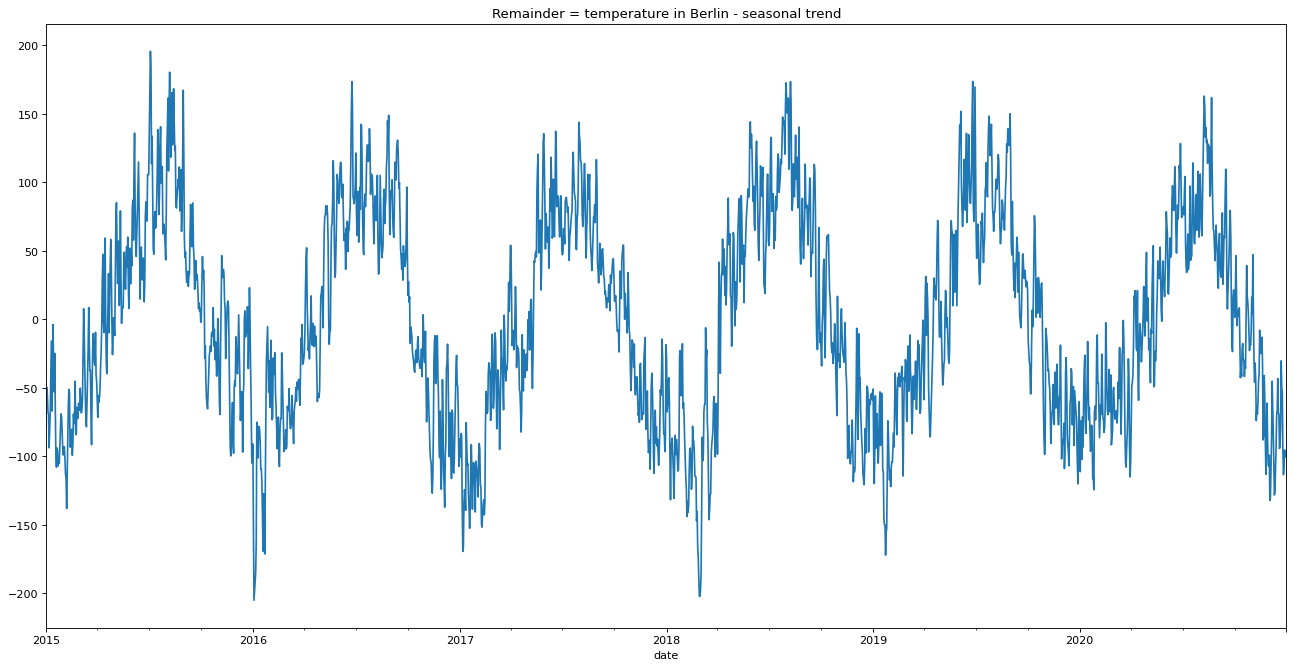

In [23]:
# remove trend to see remainder with seasonality
figure(figsize=(20, 10), dpi=80)
(df['temperature']-df['trend']).plot(title="Remainder = temperature in Berlin - seasonal trend")

### 6) Model the seasonality

In [24]:
df['month'] = df.index.month_name()
df = pd.get_dummies(df, prefix='', prefix_sep='')
df.head()

,temperature,timestep,trend,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,,
2015-01-01,39,0,103.748600,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-02,54,1,103.757567,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-03,48,2,103.766535,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-04,36,3,103.775502,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-05,34,4,103.784470,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
# to model only seasonality
X=df.drop(columns=['temperature', 'timestep', 'trend'])

In [26]:
m.fit(X,y)

LinearRegression()

In [27]:
df['seasonal'] = m.predict(X)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,temperature,timestep,trend,April,August,December,February,January,July,June,March,May,November,October,September,seasonal
date,,,,,,,,,,,,,,,,
2015-01-01,39,0,103.748600,0,0,0,0,1,0,0,0,0,0,0,0,21.085938
2015-01-02,54,1,103.757567,0,0,0,0,1,0,0,0,0,0,0,0,21.085938
2015-01-03,48,2,103.766535,0,0,0,0,1,0,0,0,0,0,0,0,21.085938
2015-01-04,36,3,103.775502,0,0,0,0,1,0,0,0,0,0,0,0,21.085938
2015-01-05,34,4,103.784470,0,0,0,0,1,0,0,0,0,0,0,0,21.085938
2015-01-06,10,5,103.793437,0,0,0,0,1,0,0,0,0,0,0,0,21.085938
2015-01-07,22,6,103.802405,0,0,0,0,1,0,0,0,0,0,0,0,21.085938
2015-01-08,36,7,103.811372,0,0,0,0,1,0,0,0,0,0,0,0,21.085938
2015-01-09,64,8,103.820340,0,0,0,0,1,0,0,0,0,0,0,0,21.085938


### 7) Plot original data and the trend + seasonality

<AxesSubplot:xlabel='date'>

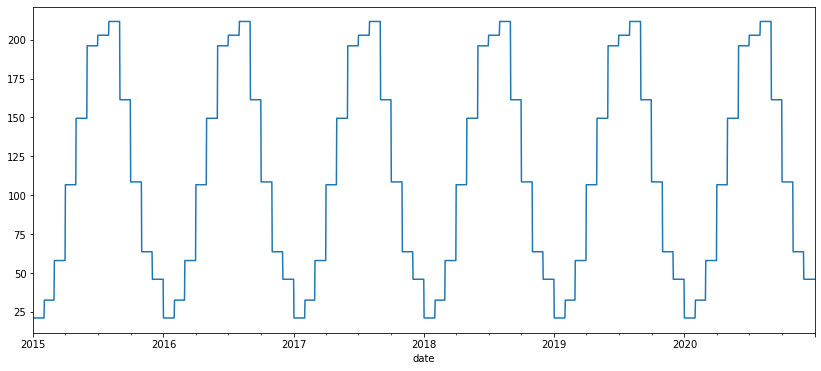

In [28]:
# plot only seasonality
df['seasonal'].plot()

In [29]:
# model seaonality and trend
X=df.drop(columns=['temperature', 'seasonal', 'trend'])
m.fit(X, y)
df['seasonal_trend'] = m.predict(X)

<AxesSubplot:xlabel='date'>

<Figure size 1600x800 with 0 Axes>

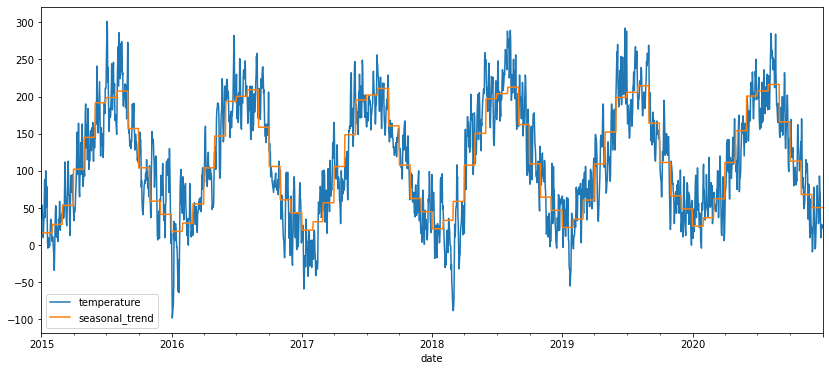

In [30]:
figure(figsize=(20, 10), dpi=80)
df[['temperature', 'seasonal_trend']].plot()

### 8) Extract the remainder

- Extract the remainder by subtracting the model of the trend and the seasonality from the original temperature data.

<AxesSubplot:xlabel='date'>

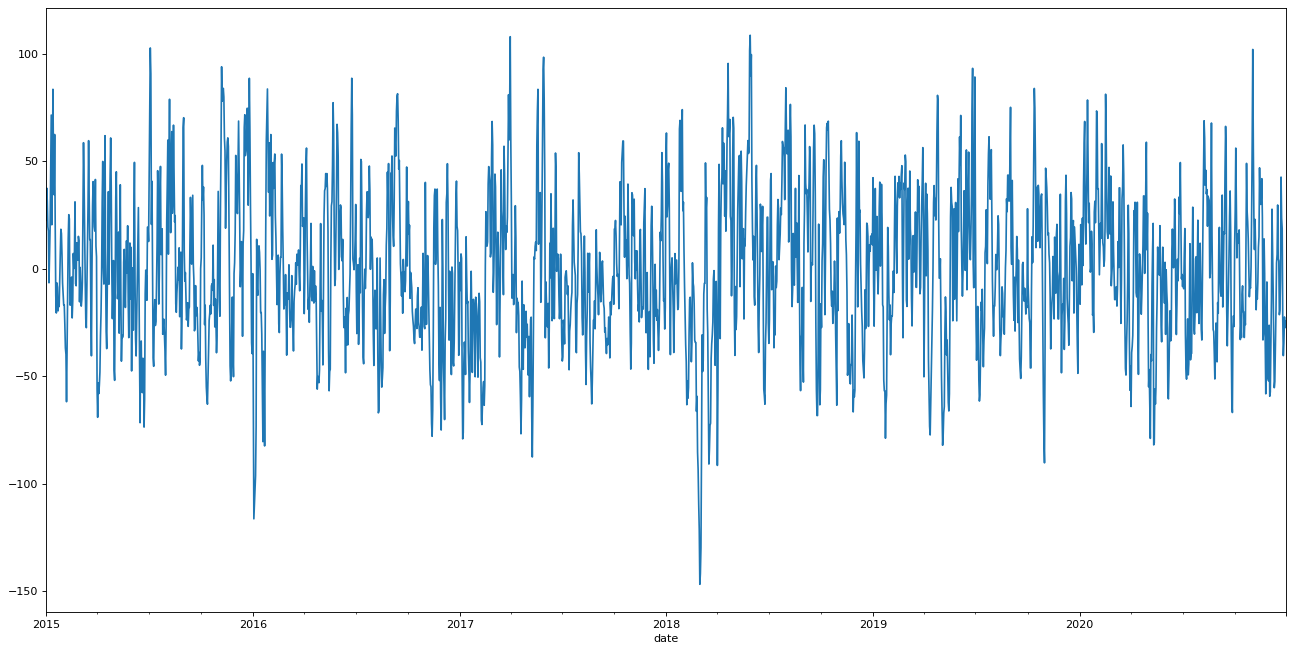

In [31]:
figure(figsize=(20, 10), dpi=80)
(df['temperature']-df['seasonal_trend']).plot()

### 9) Save the remainder in a .csv file

In [32]:
df['remainder'] = (df['temperature']-df['seasonal_trend'])
df.head()

,temperature,timestep,trend,April,August,December,February,January,July,June,March,May,November,October,September,seasonal,seasonal_trend,remainder
date,,,,,,,,,,,,,,,,,,
2015-01-01,39,0,103.748600,0,0,0,0,1,0,0,0,0,0,0,0,21.085938,16.570701,22.429299
2015-01-02,54,1,103.757567,0,0,0,0,1,0,0,0,0,0,0,0,21.085938,16.575612,37.424388
2015-01-03,48,2,103.766535,0,0,0,0,1,0,0,0,0,0,0,0,21.085938,16.580523,31.419477
2015-01-04,36,3,103.775502,0,0,0,0,1,0,0,0,0,0,0,0,21.085938,16.585434,19.414566
2015-01-05,34,4,103.784470,0,0,0,0,1,0,0,0,0,0,0,0,21.085938,16.590345,17.409655


In [33]:
df['temperature'].min(),df['temperature'].max()      #min and max mean temperature in Berlin between 2015 and 2020

(-98, 301)

### STEP 2

### Tools to find out how many lags to include in our Autoregressive Model (AR)

### Method 1

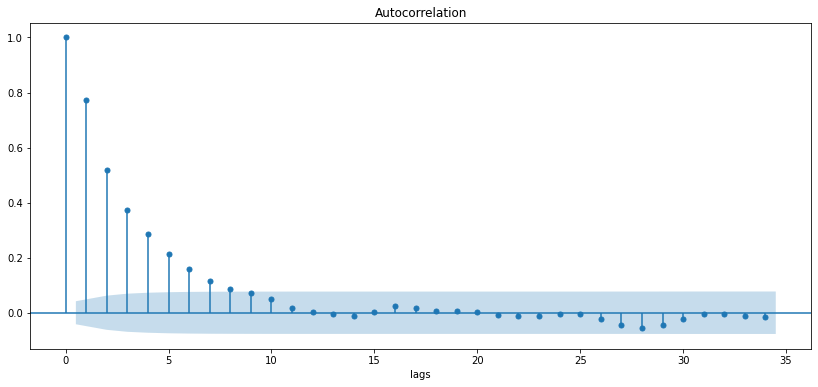

In [34]:
# we can plot auto-correlation with stats model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['remainder'])
plt.xlabel('lags');

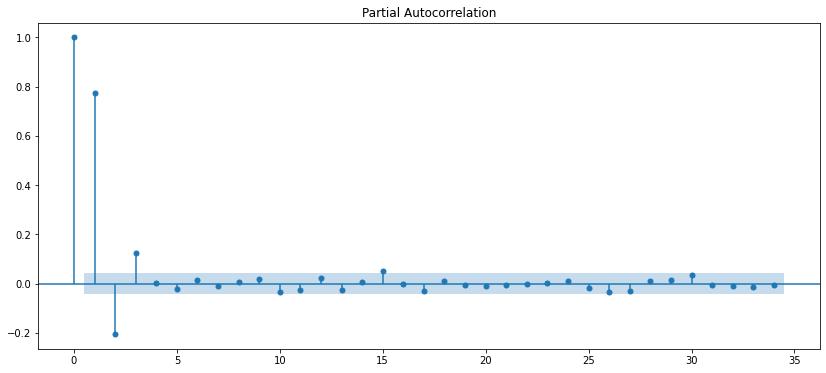

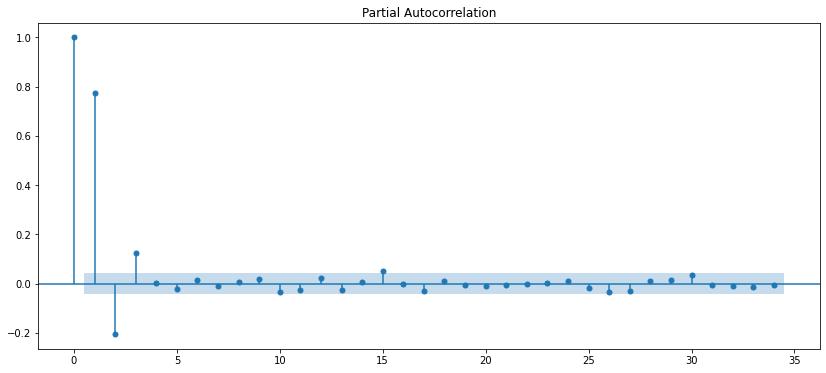

In [35]:
# Plot the partial autocorrelation between lags
plot_pacf(df['remainder'])

How to read the ACF-plot and the PACF-plot
Interpretation:

If the ACF-Plot is showing an exponential and slow decay, and the PACF-Plot shows a drop after a certain lag, we conclude that the data is best modelled by an AR(p) process. p is given by the last meaningful lag in the PACF-Plot.

### Method 2

In [36]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [37]:
selected_order = ar_select_order(df['remainder'], maxlag = 12)

/home/dani/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dani/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/home/dani/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dani/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [38]:
selected_order.ar_lags     #We need 3 lags

array([1, 2, 3])

In [39]:
ar_model = AutoReg(endog=df['remainder'], lags=3).fit()

/home/dani/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dani/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [40]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                 2192
Model:                     AutoReg(3)   Log Likelihood               -9846.176
Method:               Conditional MLE   S.D. of innovations             21.739
Date:                Wed, 26 Jan 2022   AIC                              6.163
Time:                        18:29:58   BIC                              6.176
Sample:                    01-04-2015   HQIC                             6.167
                         - 12-31-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.0266      0.465     -0.057      0.954      -0.937       0.884
remainder.L1     0.9578      0.021     45.154      0.000       0.916       0.999
remainder.L2    -0.3190      0.029    -11.125      0.000      -0.375      -0.263
remainder.L3     0.1232      0.021      5.808      0.000       0.082       0.165
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3309           -0.0000j            1.3309           -0.0000
AR.2            0.6295           -2.3882j            2.4698           -0.2090
AR.3            0.6295           +2.3882j            2.4698            0.2090
-----------------------------------------------------------------------------
"""

### STEP 3. TRAIN DATA

## Split the data and add our lag feature to the train data

- Now, I need to calculate again seasonality and trend for the training data and the test data, because the values will not be the same if we split data.
- I call the dataframe "temp", and then temp_train and temp_test

In [41]:
temp = df[['temperature']]
temp.head()

,temperature
date,
2015-01-01,39
2015-01-02,54
2015-01-03,48
2015-01-04,36
2015-01-05,34


In [42]:
temp_train = temp[:-366]   #2015-2019

temp_test = temp[-366:]    #2020 (only the last 366 days from the original df)
temp_train.head()

,temperature
date,
2015-01-01,39
2015-01-02,54
2015-01-03,48
2015-01-04,36
2015-01-05,34


In [43]:
# add timestep feature = trend
temp_train['timestep'] = list(range(temp_train.shape[0]))
temp_train.head()

<ipython-input-43-cd33572e708a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_train['timestep'] = list(range(temp_train.shape[0]))


,temperature,timestep
date,,
2015-01-01,39,0
2015-01-02,54,1
2015-01-03,48,2
2015-01-04,36,3
2015-01-05,34,4


In [44]:
# add month feature and convert to hot-one encoding 
temp_train['month'] = temp_train.index.month_name()
temp_train = pd.get_dummies(temp_train, prefix='', prefix_sep='')
temp_train.head()

<ipython-input-44-71b564998c41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_train['month'] = temp_train.index.month_name()


,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,
2015-01-01,39,0,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-02,54,1,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-03,48,2,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-04,36,3,0,0,0,0,1,0,0,0,0,0,0,0
2015-01-05,34,4,0,0,0,0,1,0,0,0,0,0,0,0


In [45]:
# define features and targets, instantiate model
X = temp_train.drop('temperature', axis=1)
y = temp_train['temperature']
m_trend_seasonal = LinearRegression()

In [46]:
# train model and add predictions as a column trend_seasonal
m_trend_seasonal.fit(X, y)
temp_train['trend_seasonal'] = m_trend_seasonal.predict(X)
temp_train.head()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal
date,,,,,,,,,,,,,,,
2015-01-01,39,0,0,0,0,0,1,0,0,0,0,0,0,0,11.990851
2015-01-02,54,1,0,0,0,0,1,0,0,0,0,0,0,0,11.996280
2015-01-03,48,2,0,0,0,0,1,0,0,0,0,0,0,0,12.001709
2015-01-04,36,3,0,0,0,0,1,0,0,0,0,0,0,0,12.007138
2015-01-05,34,4,0,0,0,0,1,0,0,0,0,0,0,0,12.012567


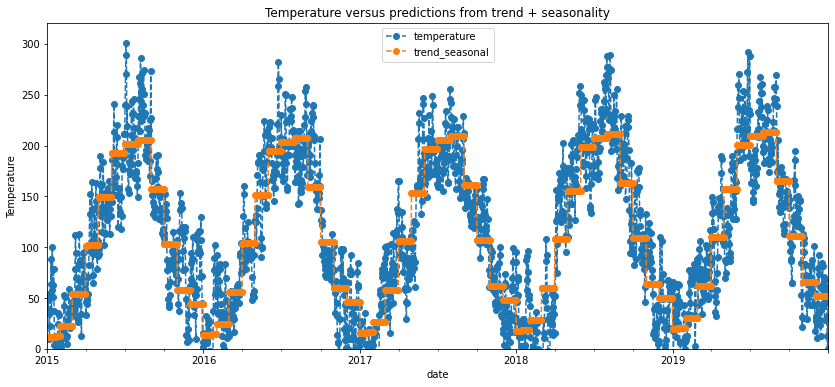

In [47]:
plot_timeseries(temp_train[['temperature', 'trend_seasonal']], 
                title="Temperature versus predictions from trend + seasonality")

In [48]:
# extract remainder as a feature
temp_train['remainder'] = temp_train['temperature'] - temp_train['trend_seasonal']
temp_train.head()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder
date,,,,,,,,,,,,,,,,
2015-01-01,39,0,0,0,0,0,1,0,0,0,0,0,0,0,11.990851,27.009149
2015-01-02,54,1,0,0,0,0,1,0,0,0,0,0,0,0,11.996280,42.003720
2015-01-03,48,2,0,0,0,0,1,0,0,0,0,0,0,0,12.001709,35.998291
2015-01-04,36,3,0,0,0,0,1,0,0,0,0,0,0,0,12.007138,23.992862
2015-01-05,34,4,0,0,0,0,1,0,0,0,0,0,0,0,12.012567,21.987433


#### REMAINDER = TEMPERATURE - SEASONAL TREND

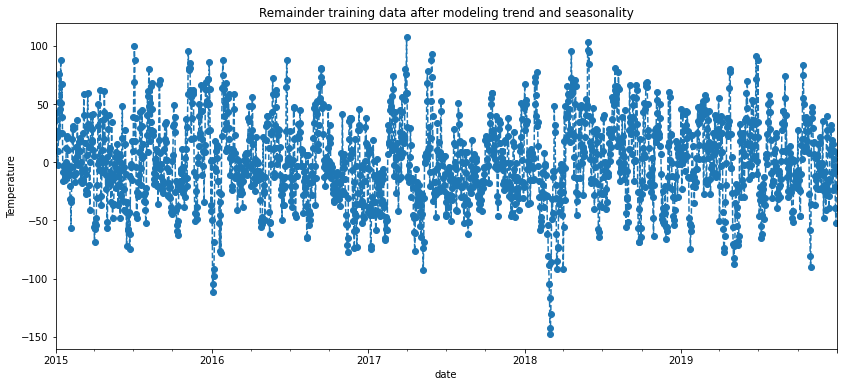

In [49]:
# plot remainder 
plot_timeseries(temp_train['remainder'], title="Remainder training data after modeling trend and seasonality", ylim=False)

#### We add 3 different lag (as we see before)

In [50]:
# since remainder appears to be a stationary time series with values at different time instants that seem correlated 
# we introduced a lag feature of the remainder
# we add it now to our model because we want better predictions for the main target passengers
temp_train['lag1'] = temp_train['remainder'].shift(1)
temp_train['lag2'] = temp_train['remainder'].shift(2)
temp_train['lag3'] = temp_train['remainder'].shift(3)
temp_train.head()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,,,
2015-01-01,39,0,0,0,0,0,1,0,0,0,0,0,0,0,11.990851,27.009149,NaN,NaN,NaN
2015-01-02,54,1,0,0,0,0,1,0,0,0,0,0,0,0,11.996280,42.003720,27.009149,NaN,NaN
2015-01-03,48,2,0,0,0,0,1,0,0,0,0,0,0,0,12.001709,35.998291,42.003720,27.009149,NaN
2015-01-04,36,3,0,0,0,0,1,0,0,0,0,0,0,0,12.007138,23.992862,35.998291,42.003720,27.009149
2015-01-05,34,4,0,0,0,0,1,0,0,0,0,0,0,0,12.012567,21.987433,23.992862,35.998291,42.003720


In [51]:
# drop na
temp_train.dropna(inplace=True)
temp_train.head()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,,,
2015-01-04,36,3,0,0,0,0,1,0,0,0,0,0,0,0,12.007138,23.992862,35.998291,42.003720,27.009149
2015-01-05,34,4,0,0,0,0,1,0,0,0,0,0,0,0,12.012567,21.987433,23.992862,35.998291,42.003720
2015-01-06,10,5,0,0,0,0,1,0,0,0,0,0,0,0,12.017996,-2.017996,21.987433,23.992862,35.998291
2015-01-07,22,6,0,0,0,0,1,0,0,0,0,0,0,0,12.023425,9.976575,-2.017996,21.987433,23.992862
2015-01-08,36,7,0,0,0,0,1,0,0,0,0,0,0,0,12.028854,23.971146,9.976575,-2.017996,21.987433


### Train the full linear auto-regression model on the training data

In [52]:
#define our new X and y and instantiate model. 
#X= timesteps, months and lag1

X = temp_train.drop(['temperature', 'trend_seasonal', 'remainder'], axis=1)
y = temp_train['temperature']

m_full = LinearRegression()
X.head()

,timestep,April,August,December,February,January,July,June,March,May,November,October,September,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,
2015-01-04,3,0,0,0,0,1,0,0,0,0,0,0,0,35.998291,42.003720,27.009149
2015-01-05,4,0,0,0,0,1,0,0,0,0,0,0,0,23.992862,35.998291,42.003720
2015-01-06,5,0,0,0,0,1,0,0,0,0,0,0,0,21.987433,23.992862,35.998291
2015-01-07,6,0,0,0,0,1,0,0,0,0,0,0,0,-2.017996,21.987433,23.992862
2015-01-08,7,0,0,0,0,1,0,0,0,0,0,0,0,9.976575,-2.017996,21.987433


In [53]:
# train model and add predictions on training data
m_full.fit(X,y)

temp_train['predictions_full'] = m_full.predict(X)
temp_train.head()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,lag2,lag3,predictions_full
date,,,,,,,,,,,,,,,,,,,,
2015-01-04,36,3,0,0,0,0,1,0,0,0,0,0,0,0,12.007138,23.992862,35.998291,42.003720,27.009149,36.427389
2015-01-05,34,4,0,0,0,0,1,0,0,0,0,0,0,0,12.012567,21.987433,23.992862,35.998291,42.003720,28.784359
2015-01-06,10,5,0,0,0,0,1,0,0,0,0,0,0,0,12.017996,-2.017996,21.987433,23.992862,35.998291,29.955094
2015-01-07,22,6,0,0,0,0,1,0,0,0,0,0,0,0,12.023425,9.976575,-2.017996,21.987433,23.992862,5.931016
2015-01-08,36,7,0,0,0,0,1,0,0,0,0,0,0,0,12.028854,23.971146,9.976575,-2.017996,21.987433,24.981306


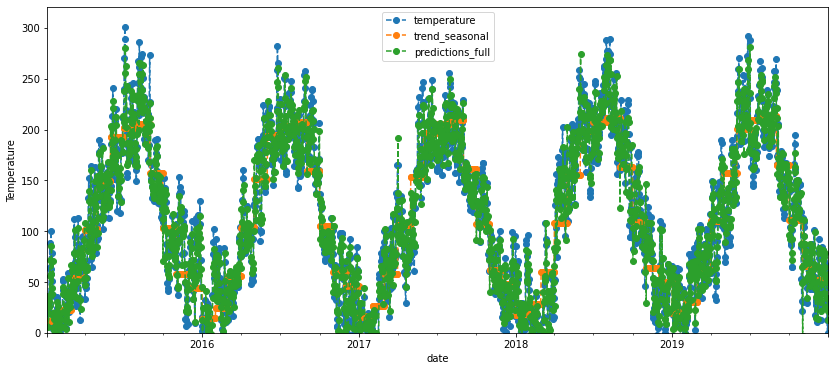

In [54]:
# plot target and predictions
plot_timeseries(temp_train[['temperature', 'trend_seasonal', 'predictions_full']])

In [55]:
# extracting full model coefficients
pd.DataFrame(m_full.coef_.reshape(1,16), columns=X.columns)

,timestep,April,August,December,February,January,July,June,March,May,November,October,September,lag1,lag2,lag3
0,0.005512,-6.548901,97.074404,-64.338259,-85.475489,-95.50914,92.8083,83.262509,-53.397202,42.234057,-51.360415,-5.859869,47.110007,0.962496,-0.323377,0.131022


### STEP 4. How can we evaluate our model ? (before introducing test data)

In [56]:
# Create a TimeSeriesSplit object
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
ts_split = TimeSeriesSplit(n_splits=5)
time_cv = ts_split.split(X, y) # this is a python generator

In [57]:
# let's see how that works
# Split the training data into folds
for i, (train_index, validation_index) in enumerate(time_cv):
    print("The training data for iteration #{} are the observations steps  = {}".format(i+1, train_index))
    print("size of training data = {}".format(len(train_index)))
    print("The validation data for iteration #{} are the observations steps = {}".format(i+1, validation_index))
    print("size of validation data = {}".format(len(validation_index)))   

The training data for iteration #1 are the observations steps  = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

In [58]:
from sklearn.metrics import r2_score

In [59]:
# cross validate model and read scores 
time_cv = ts_split.split(X, y)

estimator = LinearRegression()
r_squared_scores = cross_val_score(estimator=estimator, X=X, y=y, cv=time_cv )

print(r_squared_scores)
print(r_squared_scores.mean())

[0.71396344 0.90232629 0.91946784 0.92331759 0.89685114]
0.8711852603831194


## STEP 5. Apply our trained model on test data

In [60]:
### -  we have to apply the same steps we applied to our train data
### - IMPORTANT! Column order MUST be identical

In [61]:
temp_test.head()  #2020

,temperature
date,
2020-01-01,27
2020-01-02,9
2020-01-03,46
2020-01-04,42
2020-01-05,18


In [62]:
temp_test.tail()

,temperature
date,
2020-12-27,16
2020-12-28,28
2020-12-29,23
2020-12-30,25
2020-12-31,26


### 5.1 Add time step to test data

In [63]:
# add time step

last_train_timestep = temp_train['timestep'].max() 
temp_test['timestep'] = list(range(last_train_timestep + 1, len(temp_test) + last_train_timestep + 1))
temp_test.head()

<ipython-input-63-cb93c046b1fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_test['timestep'] = list(range(last_train_timestep + 1, len(temp_test) + last_train_timestep + 1))


,temperature,timestep
date,,
2020-01-01,27,1826
2020-01-02,9,1827
2020-01-03,46,1828
2020-01-04,42,1829
2020-01-05,18,1830


In [64]:
temp_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   temperature  366 non-null    int64
 1   timestep     366 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB


### 5.2 Add encoded month 

In [65]:
temp_test.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='date', length=366)

In [66]:
# we have to apply the same steps we applied to our train data

temp_test['month'] = temp_test.index.month_name()
temp_test = pd.get_dummies(temp_test, prefix='', prefix_sep='')
temp_test.head()

<ipython-input-66-0c741586eafb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_test['month'] = temp_test.index.month_name()


,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,
2020-01-01,27,1826,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-02,9,1827,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-03,46,1828,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-04,42,1829,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-05,18,1830,0,0,0,0,1,0,0,0,0,0,0,0


### 5.3 Add trend and seasonality prediction

In [67]:
X_test = temp_test.drop('temperature', axis=1)
X_test.head()

,timestep,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,
2020-01-01,1826,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-02,1827,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-03,1828,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-04,1829,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-05,1830,0,0,0,0,1,0,0,0,0,0,0,0


In [68]:
temp_test['trend_seasonal'] = m_trend_seasonal.predict(X_test)
temp_test.head()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal
date,,,,,,,,,,,,,,,
2020-01-01,27,1826,0,0,0,0,1,0,0,0,0,0,0,0,21.904195
2020-01-02,9,1827,0,0,0,0,1,0,0,0,0,0,0,0,21.909624
2020-01-03,46,1828,0,0,0,0,1,0,0,0,0,0,0,0,21.915053
2020-01-04,42,1829,0,0,0,0,1,0,0,0,0,0,0,0,21.920482
2020-01-05,18,1830,0,0,0,0,1,0,0,0,0,0,0,0,21.925911


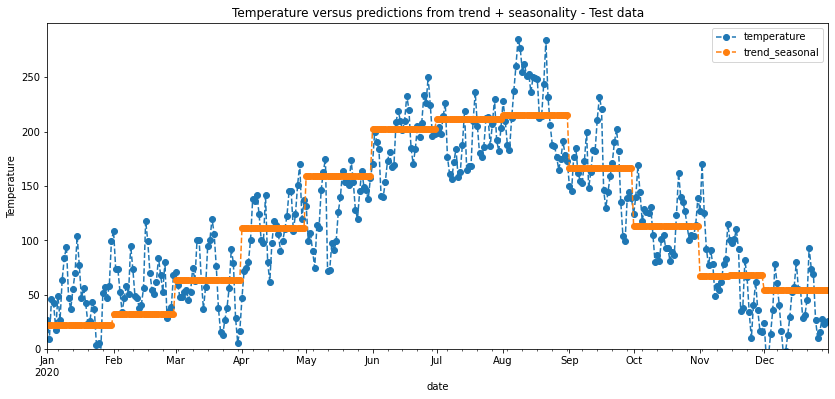

In [69]:
# plot

plot_timeseries(temp_test[['temperature', 'trend_seasonal']], 
                title="Temperature versus predictions from trend + seasonality - Test data")

### 5.4 Calculate remainder and add lag1, lag2, lag3

In [70]:
temp_test['remainder'] = temp_test['temperature'] - temp_test['trend_seasonal']

# Create the lagged variable
temp_test['lag1'] = temp_test['remainder'].shift(1)
temp_test['lag2'] = temp_test['remainder'].shift(2)
temp_test['lag3'] = temp_test['remainder'].shift(3)
temp_test.head()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,,,
2020-01-01,27,1826,0,0,0,0,1,0,0,0,0,0,0,0,21.904195,5.095805,NaN,NaN,NaN
2020-01-02,9,1827,0,0,0,0,1,0,0,0,0,0,0,0,21.909624,-12.909624,5.095805,NaN,NaN
2020-01-03,46,1828,0,0,0,0,1,0,0,0,0,0,0,0,21.915053,24.084947,-12.909624,5.095805,NaN
2020-01-04,42,1829,0,0,0,0,1,0,0,0,0,0,0,0,21.920482,20.079518,24.084947,-12.909624,5.095805
2020-01-05,18,1830,0,0,0,0,1,0,0,0,0,0,0,0,21.925911,-3.925911,20.079518,24.084947,-12.909624


In [71]:
temp_train.tail()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,lag2,lag3,predictions_full
date,,,,,,,,,,,,,,,,,,,,
2019-12-27,31,1821,0,0,1,0,0,0,0,0,0,0,0,0,52.153003,-21.153003,-3.147574,2.857855,9.863284,50.353783
2019-12-28,13,1822,0,0,1,0,0,0,0,0,0,0,0,0,52.158432,-39.158432,-21.153003,-3.147574,2.857855,34.053298
2019-12-29,0,1823,0,0,1,0,0,0,0,0,0,0,0,0,52.163861,-52.163861,-39.158432,-21.153003,-3.147574,21.764362
2019-12-30,45,1824,0,0,1,0,0,0,0,0,0,0,0,0,52.169290,-7.169290,-52.163861,-39.158432,-21.153003,12.715643
2019-12-31,60,1825,0,0,1,0,0,0,0,0,0,0,0,0,52.174719,7.825281,-7.169290,-52.163861,-39.158432,57.874799


### 5.5 Use trained full model to predict temperatures

In [72]:
# must fill NaN on 2020-01-01

temp_test.loc['2020-01-01', 'lag1'] = temp_train.loc['2019-12-31', 'remainder']
temp_test.loc['2020-01-01', 'lag2'] = temp_train.loc['2019-12-30', 'remainder']
temp_test.loc['2020-01-01', 'lag3'] = temp_train.loc['2019-12-29', 'remainder']

temp_test.loc['2020-01-02', 'lag2'] = temp_train.loc['2019-12-31', 'remainder']
temp_test.loc['2020-01-02', 'lag3'] = temp_train.loc['2019-12-30', 'remainder']

temp_test.loc['2020-01-03', 'lag3'] = temp_test.loc['2020-01-01', 'lag1']
temp_test.head()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,,,
2020-01-01,27,1826,0,0,0,0,1,0,0,0,0,0,0,0,21.904195,5.095805,7.825281,-7.169290,-52.163861
2020-01-02,9,1827,0,0,0,0,1,0,0,0,0,0,0,0,21.909624,-12.909624,5.095805,7.825281,-7.169290
2020-01-03,46,1828,0,0,0,0,1,0,0,0,0,0,0,0,21.915053,24.084947,-12.909624,5.095805,7.825281
2020-01-04,42,1829,0,0,0,0,1,0,0,0,0,0,0,0,21.920482,20.079518,24.084947,-12.909624,5.095805
2020-01-05,18,1830,0,0,0,0,1,0,0,0,0,0,0,0,21.925911,-3.925911,20.079518,24.084947,-12.909624


In [73]:
# make full model predictions

X_test = temp_test.drop(['temperature', 'trend_seasonal', 'remainder'], axis=1)
# Create the predictions
temp_test['predictions_full'] = m_full.predict(X_test)
temp_test.head()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,lag2,lag3,predictions_full
date,,,,,,,,,,,,,,,,,,,,
2020-01-01,27,1826,0,0,0,0,1,0,0,0,0,0,0,0,21.904195,5.095805,7.825281,-7.169290,-52.163861,24.887431
2020-01-02,9,1827,0,0,0,0,1,0,0,0,0,0,0,0,21.909624,-12.909624,5.095805,7.825281,-7.169290,23.312201
2020-01-03,46,1828,0,0,0,0,1,0,0,0,0,0,0,0,21.915053,24.084947,-12.909624,5.095805,7.825281,8.834827
2020-01-04,42,1829,0,0,0,0,1,0,0,0,0,0,0,0,21.920482,20.079518,24.084947,-12.909624,5.095805,49.912385
2020-01-05,18,1830,0,0,0,0,1,0,0,0,0,0,0,0,21.925911,-3.925911,20.079518,24.084947,-12.909624,31.740385


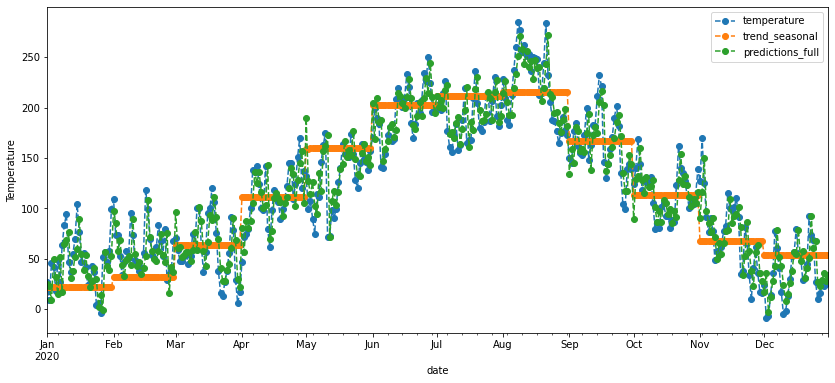

In [74]:
plot_timeseries(temp_test[['temperature', 'trend_seasonal', 'predictions_full']], ylim=False)

In [75]:
# let's check R squared score
print(r2_score(temp_test['temperature'], temp_test['trend_seasonal']))
print(r2_score(temp_test['temperature'], temp_test['predictions_full']))

0.7622305223225858
0.9006074949041496


## STEP 6. Generate short term predictions

In [76]:
# join test and train data together
temp_combined = temp_train.append(temp_test)
temp_combined.tail()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,lag2,lag3,predictions_full
date,,,,,,,,,,,,,,,,,,,,
2020-12-27,16,2187,0,0,1,0,0,0,0,0,0,0,0,0,54.140015,-38.140015,-44.134586,-27.129157,14.876272,23.275277
2020-12-28,28,2188,0,0,1,0,0,0,0,0,0,0,0,0,54.145444,-26.145444,-38.140015,-44.134586,-27.129157,29.046079
2020-12-29,23,2189,0,0,1,0,0,0,0,0,0,0,0,0,54.150873,-31.150873,-26.145444,-38.140015,-44.134586,36.429727
2020-12-30,25,2190,0,0,1,0,0,0,0,0,0,0,0,0,54.156302,-29.156302,-31.150873,-26.145444,-38.140015,28.524184
2020-12-31,26,2191,0,0,1,0,0,0,0,0,0,0,0,0,54.161731,-28.161731,-29.156302,-31.150873,-26.145444,33.639654


In [77]:
temp_combined.head()

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,lag2,lag3,predictions_full
date,,,,,,,,,,,,,,,,,,,,
2015-01-04,36,3,0,0,0,0,1,0,0,0,0,0,0,0,12.007138,23.992862,35.998291,42.003720,27.009149,36.427389
2015-01-05,34,4,0,0,0,0,1,0,0,0,0,0,0,0,12.012567,21.987433,23.992862,35.998291,42.003720,28.784359
2015-01-06,10,5,0,0,0,0,1,0,0,0,0,0,0,0,12.017996,-2.017996,21.987433,23.992862,35.998291,29.955094
2015-01-07,22,6,0,0,0,0,1,0,0,0,0,0,0,0,12.023425,9.976575,-2.017996,21.987433,23.992862,5.931016
2015-01-08,36,7,0,0,0,0,1,0,0,0,0,0,0,0,12.028854,23.971146,9.976575,-2.017996,21.987433,24.981306


In [78]:
temp_combined.isna().sum()

temperature         0
timestep            0
April               0
August              0
December            0
February            0
January             0
July                0
June                0
March               0
May                 0
November            0
October             0
September           0
trend_seasonal      0
remainder           0
lag1                0
lag2                0
lag3                0
predictions_full    0
dtype: int64

In [79]:
# Re-train the model on the whole dataset
X_combined = temp_combined.drop(columns=['temperature', 'trend_seasonal', 'remainder', 'predictions_full'])
y_combined = temp_combined['temperature']

m_full_combined = LinearRegression()
m_full_combined.fit(X_combined, y_combined)

LinearRegression()

#### Generate prediction for a future time

In [80]:
temp_combined.index.max()

Timestamp('2020-12-31 00:00:00')

In [81]:
temp_combined.head()  #2020

,temperature,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,lag2,lag3,predictions_full
date,,,,,,,,,,,,,,,,,,,,
2015-01-04,36,3,0,0,0,0,1,0,0,0,0,0,0,0,12.007138,23.992862,35.998291,42.003720,27.009149,36.427389
2015-01-05,34,4,0,0,0,0,1,0,0,0,0,0,0,0,12.012567,21.987433,23.992862,35.998291,42.003720,28.784359
2015-01-06,10,5,0,0,0,0,1,0,0,0,0,0,0,0,12.017996,-2.017996,21.987433,23.992862,35.998291,29.955094
2015-01-07,22,6,0,0,0,0,1,0,0,0,0,0,0,0,12.023425,9.976575,-2.017996,21.987433,23.992862,5.931016
2015-01-08,36,7,0,0,0,0,1,0,0,0,0,0,0,0,12.028854,23.971146,9.976575,-2.017996,21.987433,24.981306


In [82]:
# so we need to generate features for the time point 2021-01-01

X_future = []

timestep = temp_combined['timestep'].max() + 1
months = [0]*4 + [1] + [0]*7   #dummy code for Jan (january is column5)
lag = temp_combined.loc['2020-12-31', 'remainder'] # taking the last remainder 
lag2 = temp_combined.loc['2020-12-30', 'remainder']
lag3 = temp_combined.loc['2020-12-29', 'remainder']
print(timestep, months, lag, lag2, lag3)

2192 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] -28.161730863013176 -29.15630186858828 -31.150872874163383


In [83]:
X_future = []
X_future.append(timestep)
X_future.extend(months)
X_future.append(lag)
X_future.append(lag2)
X_future.append(lag3)
X_future

#X_future[2192, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, -28.161730863013176, -29.15630186858828 -31.150872874163383]

[2192,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -28.161730863013176,
 -29.15630186858828,
 -31.150872874163383]

In [84]:
X_future = pd.DataFrame([X_future])
X_future.columns = X_combined.columns

X_future

,timestep,April,August,December,February,January,July,June,March,May,November,October,September,lag1,lag2,lag3
0,2192,0,0,0,0,1,0,0,0,0,0,0,0,-28.161731,-29.156302,-31.150873


In [85]:
print("Prediction for 2021-01-01 is {}".format(m_full_combined.predict(X_future)[0]))
print("Real temperature for 2021-01-01 is 2.1")

Prediction for 2021-01-01 is 3.4470013873894345
Real temperature for 2021-01-01 is 2.1


In [86]:
m_full_combined.coef_

array([ 5.33714773e-03, -6.14889666e+00,  9.72744506e+01, -6.50901019e+01,
       -8.43590143e+01, -9.41955697e+01,  9.20563646e+01,  8.31748010e+01,
       -5.39578764e+01,  4.07946325e+01, -5.13560031e+01, -5.47515570e+00,
        4.72823691e+01,  9.57142200e-01, -3.18631540e-01,  1.23230795e-01])

### My model has predicted a temperature of 0.3 degrees by January 1, 2021. In reality, that day the temperature was 2.1 degrees.